# Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import FactorAnalysis
from plotnine import *

# Data Preparation

We will work with the **iris** dataset. It is shipped with *sklearn*.

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

print(X.head())  # head of dataframe
print(X.columns)  # columns
print(X.shape)  # object shape

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
(150, 4)


# Factor Analysis

In [7]:
steps = [
    ('scalar', StandardScaler()),
    ('fa', FactorAnalysis(n_components=2, random_state=123))
]

pipeline = Pipeline(steps)

factors = pipeline.fit_transform(X)

We want to have a target vector with names instead of numbers. To achieve this, we need to create a mapping, and then use list comprehension to create a new list *y_strings*.

In [8]:
mapping = {0: 'setosa', 1:'versicolor', 2: 'virginica'}
y_strings = y.astype(int)
y_strings = [mapping[y[i]] for i in range(len(y_strings))]

In [9]:
factors_df = pd.DataFrame(factors, columns=['F1', 'F2'])
factors_df['target'] = y_strings

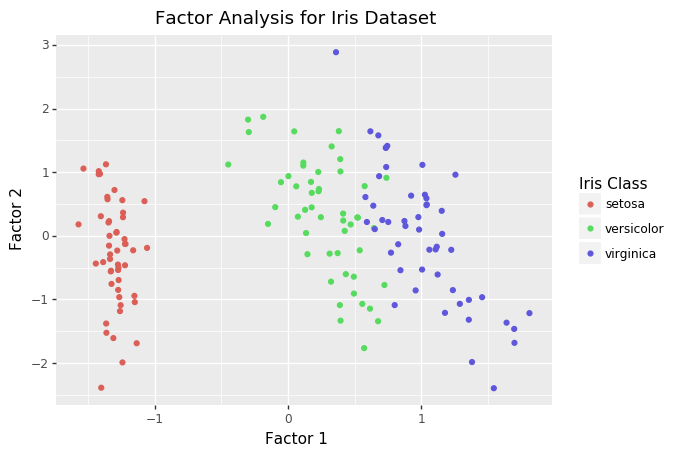

<ggplot: (127878930678)>

In [10]:
(ggplot(data=factors_df) 
    + aes(x='F1', y='F2', color='target') 
    + geom_point()
    + labs(x='Factor 1', y='Factor 2', title='Factor Analysis for Iris Dataset')
    + scale_color_discrete(name='Iris Class')
)

In [11]:
factors

array([[-1.32825530e+00, -5.59731650e-01],
       [-1.33775927e+00, -1.07437883e-04],
       [-1.40251726e+00,  3.07654060e-01],
       [-1.30018718e+00,  7.19597104e-01],
       [-1.33378089e+00, -3.63827977e-01],
       [-1.14781450e+00, -1.04186198e+00],
       [-1.35241167e+00,  5.74259749e-01],
       [-1.27963202e+00, -2.31834453e-01],
       [-1.36406105e+00,  1.12325395e+00],
       [-1.28641890e+00,  4.93345649e-02],
       [-1.25907687e+00, -1.18326601e+00],
       [-1.23653434e+00,  2.91966416e-01],
       [-1.34520924e+00,  2.09140066e-01],
       [-1.53285247e+00,  1.05639008e+00],
       [-1.39964214e+00, -2.38683511e+00],
       [-1.24041959e+00, -1.98945539e+00],
       [-1.36264174e+00, -1.37804537e+00],
       [-1.32610990e+00, -5.49101643e-01],
       [-1.13382519e+00, -1.68815068e+00],
       [-1.27306618e+00, -5.36977309e-01],
       [-1.15100016e+00, -9.43252800e-01],
       [-1.27069974e+00, -5.02373464e-01],
       [-1.56982637e+00,  1.79498675e-01],
       [-1.